# 로지스틱 회귀 연구과제 

> https|//www.kaggle.com/datasets/blastchar/telco-customer-churn

로지스틱 회귀를 활용하면 고객 유지를 위한 행동을 예측합니다. 관련된 모든 고객 데이터를 분석하고 집중적인 고객 유지 프로그램을 개발할 수 있다.

다음의 데이터의 각 행은 고객을 나타내고, 각 열에는 메타데이터 열에 설명된 고객 속성이 포함되어 있으며 데이터셋에는 다음과 같은 정보들이 포함되어 있따.

- 지난 달에 떠난 고객 - 해당 열은 Churn이라고 함(종속변수)
- 각 고객이 등록한 서비스 – 전화, 다중 회선, 인터넷, 온라인 보안, 온라인 백업, 장치 - 보호, 기술 지원, TV 및 영화 스트리밍
- 고객 계정 정보 - 고객 유지 기간, 계약, 결제 방법, 전자 청구서, 월별 요금, 총 요금
- 고객에 대한 인구통계 정보 – 성별, 연령대, 파트너 및 부양가족 유무

상세 메타 데이터는 아래와 같습니다.

| 변수명 | 설명 | 비고 |
|---|---|---|
| customerID | 소비자의 식별자 | |
| gender | 성별 | |
| SeniorCitizen | 노인인지의 여부 | |
| Partner | 배우자의 유무 | |
| Dependents | 자녀의 유무 | |
| tenure | 고객의 가입 기간 | | 개월 수 |
| PhoneService | 휴대폰 서비스를 가입 했는지의 여부 | |
| MultipleLines | 여러 개의 통신선을 서비스 받고 있는지의 여부 | Yes, No, No phone service / 휴대폰 서비스를 가입한 고객만 해당됨. |
| InternetService | 인터넷 서비스 제공자 | DSL, Fiber optic, No |
| OnlineSecurity | 온라인 보안 서비스를 가입 했는지의 여부 | Yes, No, No internet service / 인터넷 서비스를 가입한 고객만 해당됨. |
| OnlineBackup | 온라인 백업 서비스를 가입 했는지의 여부 | Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨. |
| DeviceProtection 기기 보호 서비스를 가입 했는지의 여부 | Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨. |
| TechSupport | 기술 서포트 서비스를 가입 했는지의 여부 | Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨. |
| StreamingTV | TV 스트리밍 서비스를 가입 했는지의 여부 | Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨. |
| StreamingMovies | 영화 스트리밍 서비스를 가입 했는지의 여부 | Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨. |
| Contract | 계약 유형 | Month-to-month, One year, Two year |
| PaperlessBilling | 전자 고지서 여부 | |
| PaymentMethod | 요금 지불 방법 | Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic) |
| MonthlyCharges | 매달 고객에게 청구되는 금액 | |
| TotalCharges | 고객에게 청구된 총 금액 | |
| Churn | 지난 한 달 내에 떠난 고객인지의 여부 | |

In [288]:
import warnings
warnings.filterwarnings(action='ignore')

from helper.util import *
from helper.plot import *
from helper.analysis import *
from helper.classification import *

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [289]:
origin = my_read_data('https://data.hossam.kr/mldata/telecom_customer.xlsx',categories=['Churn'])
df = origin.copy()
# 기준점 : 정확도 78%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [290]:
column_name = list(df.columns)
df['alone'] = 'No'
alone_check = set()
check = set()
for i,v in enumerate(df['Partner']):
    if v == 'No': check.add(i)
for i,v in enumerate(df['Dependents']):
    if v == 'No': 
        if i in check:alone_check.add(i)
for i,v in enumerate(df['alone']):
    if i in alone_check: df['alone'][i] = 'Yes'
df['alone'].value_counts()

No     3763
Yes    3280
Name: alone, dtype: int64

In [291]:
for i in column_name:
    print(i,origin[i].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [292]:
for i in column_name:
    print(df[i].value_counts())

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes

In [293]:
for i in ['PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
    df[i] = df[i].apply(lambda x : str(x).split()[0])

In [294]:
df["InternetService"] = df["InternetService"].map({"Fiber optic": 1, "DSL":1,'No':0})
df["PaymentMethod"] = df["PaymentMethod"].map({"Credit card (automatic)":1,'Bank transfer (automatic)':1,'Electronic check':0,'Mailed check':0})
df['Contract'] = df['Contract'].map({"Month-to-month":0,'One year':1,"Two year":1})
['gender','PhoneService','MultipleLines']

['gender',
 '',
 '',
 'PhoneService',
 '',
 'PhoneService',
 '',
 'MultipleLines',
 '',
 '',
 '',
 '',
 '',
 '']

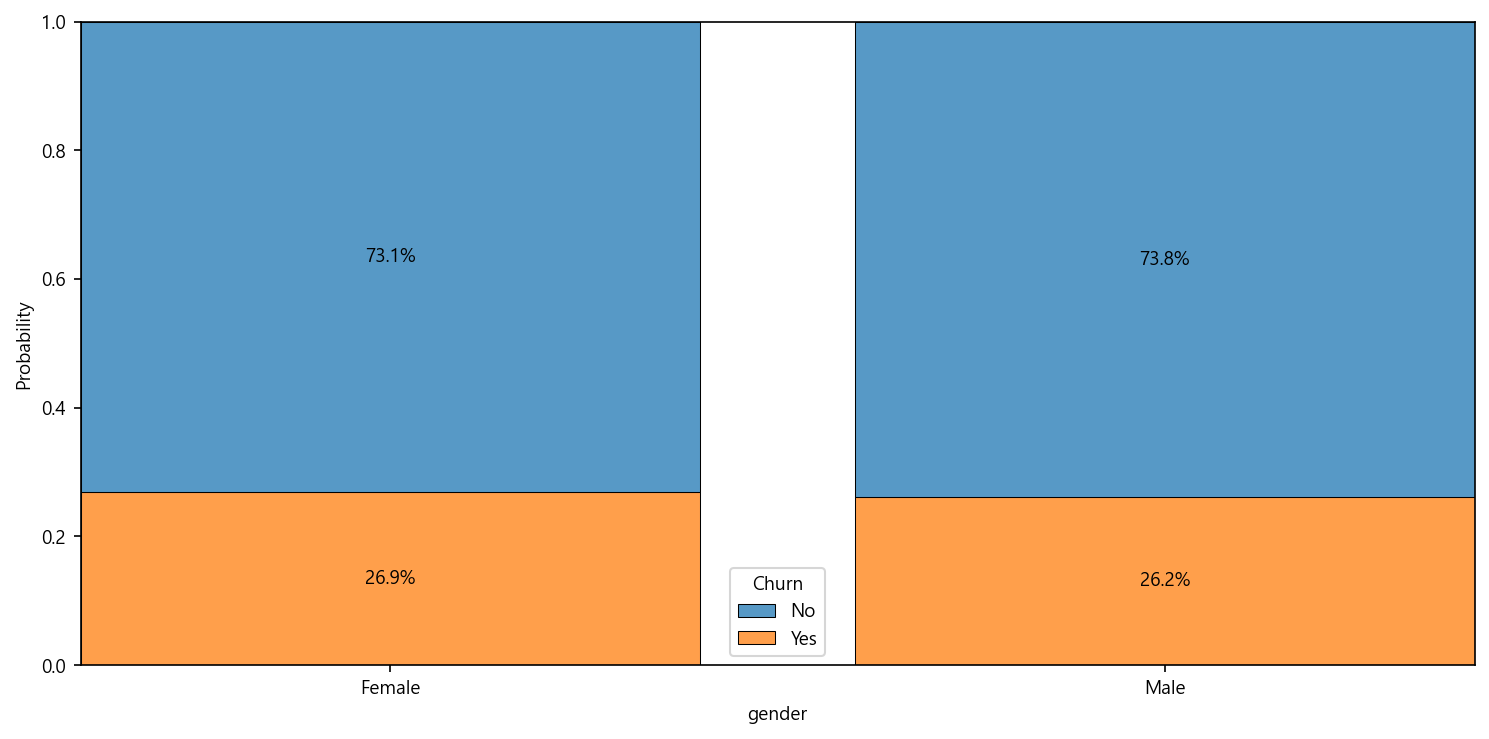

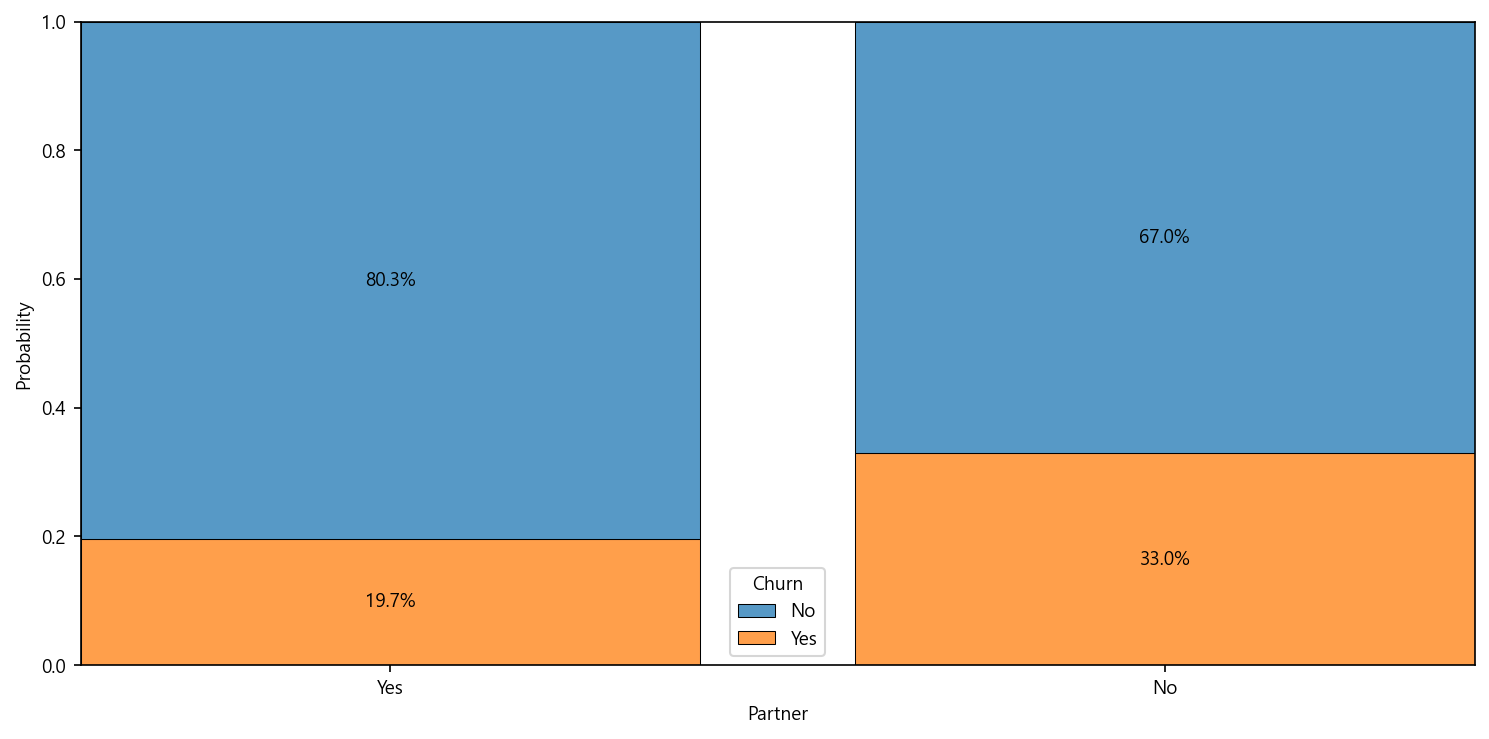

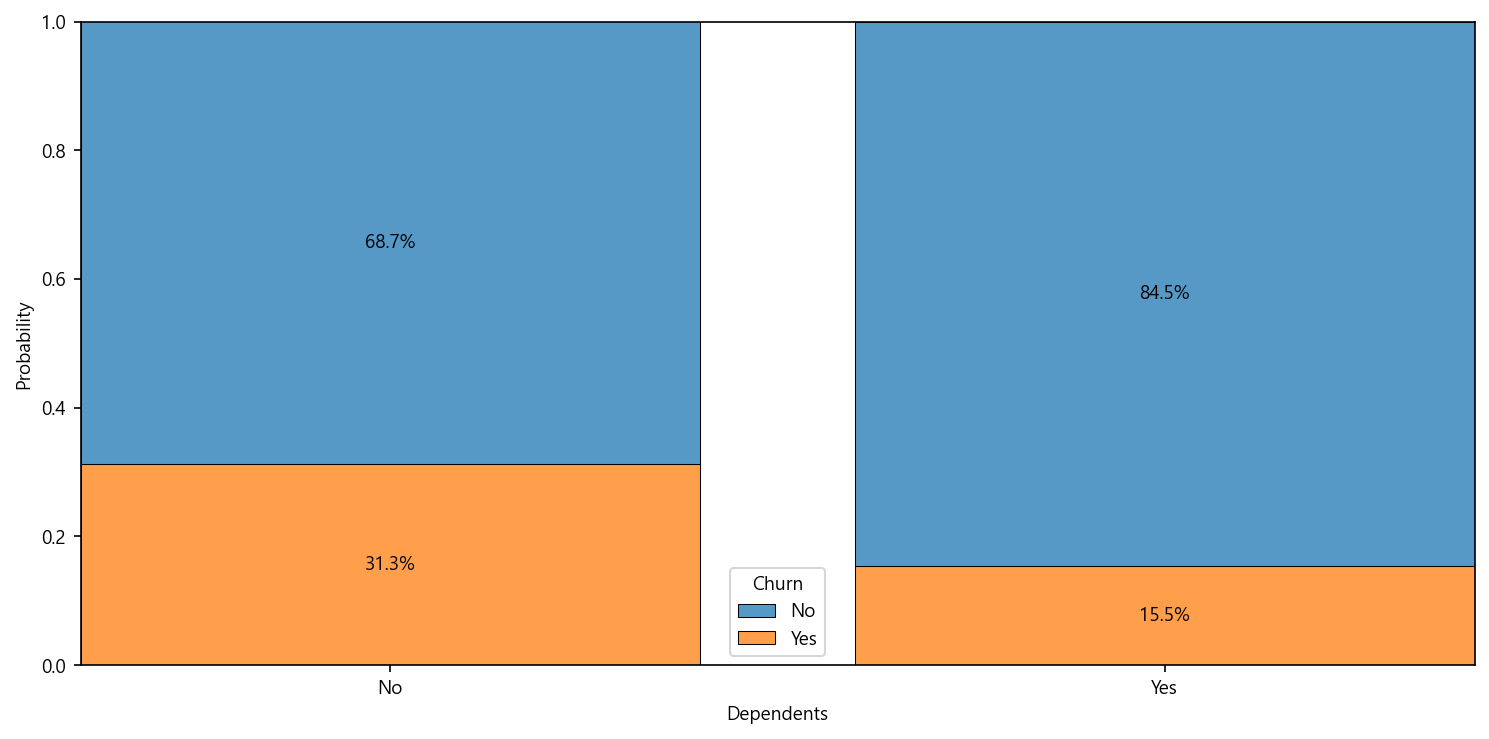

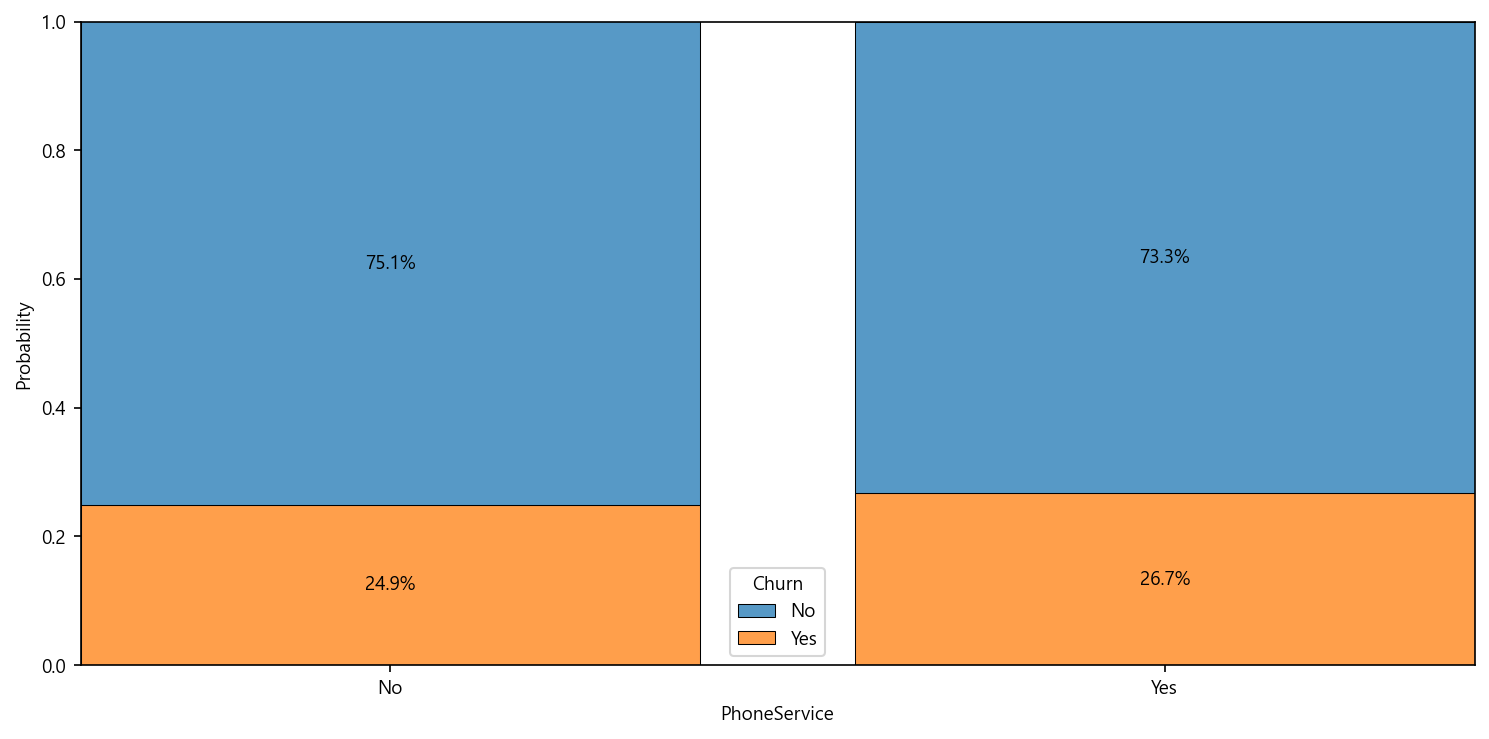

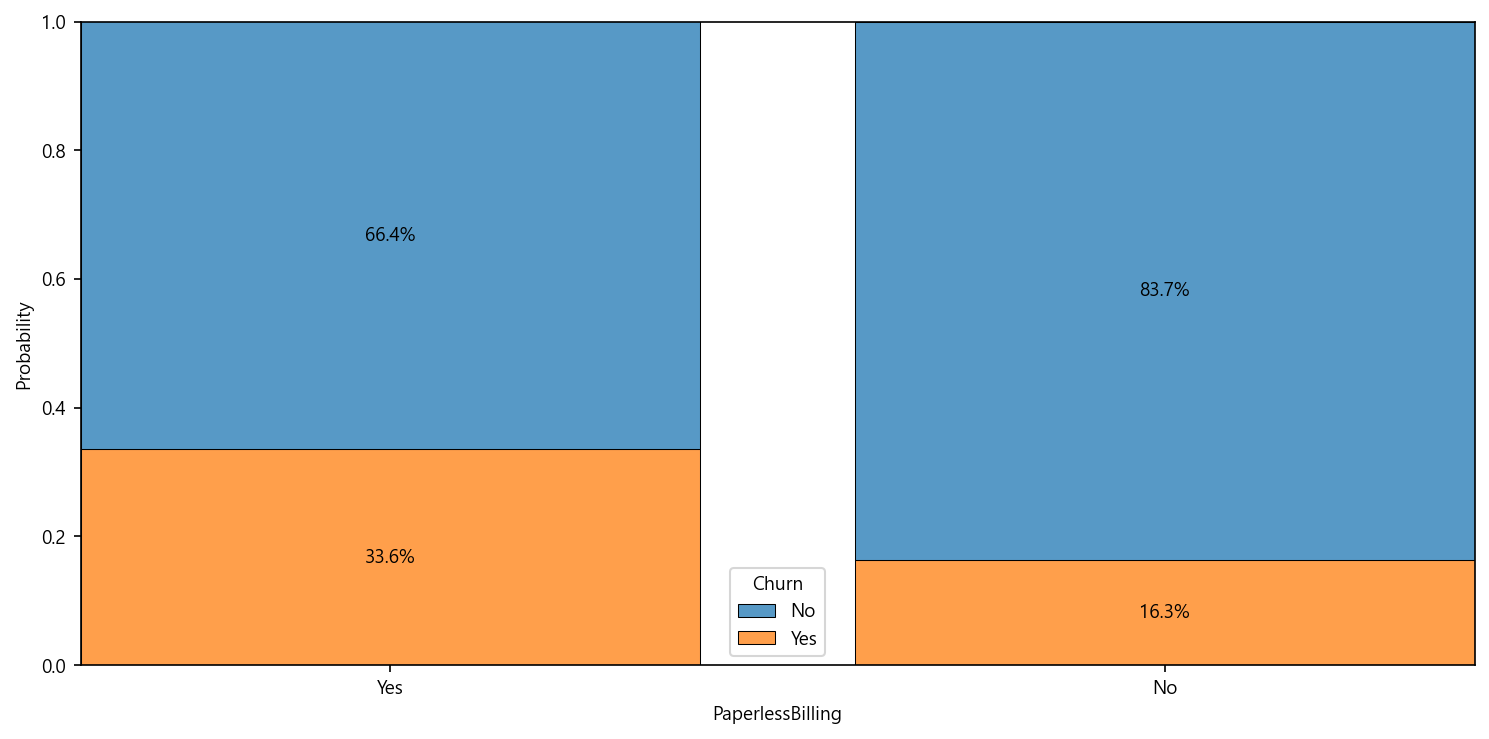

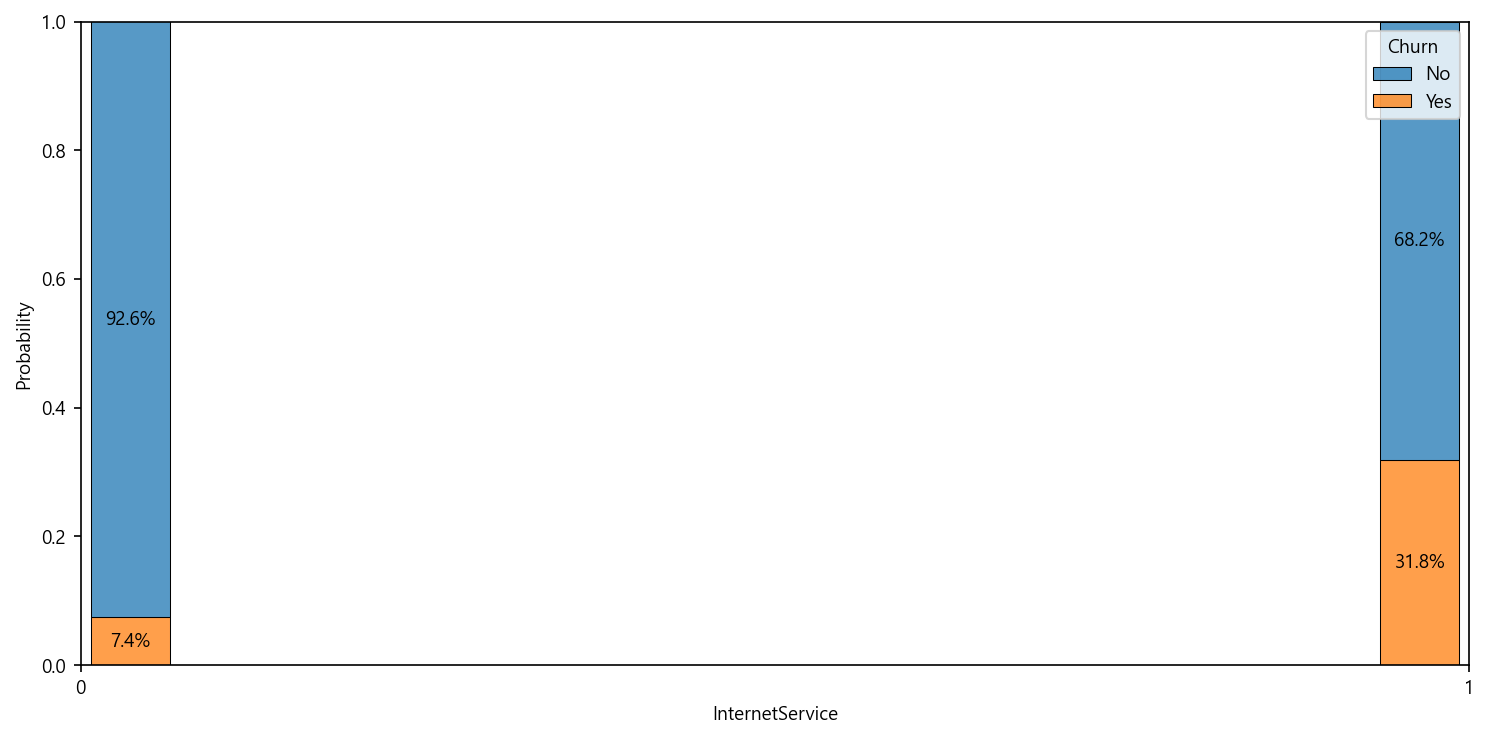

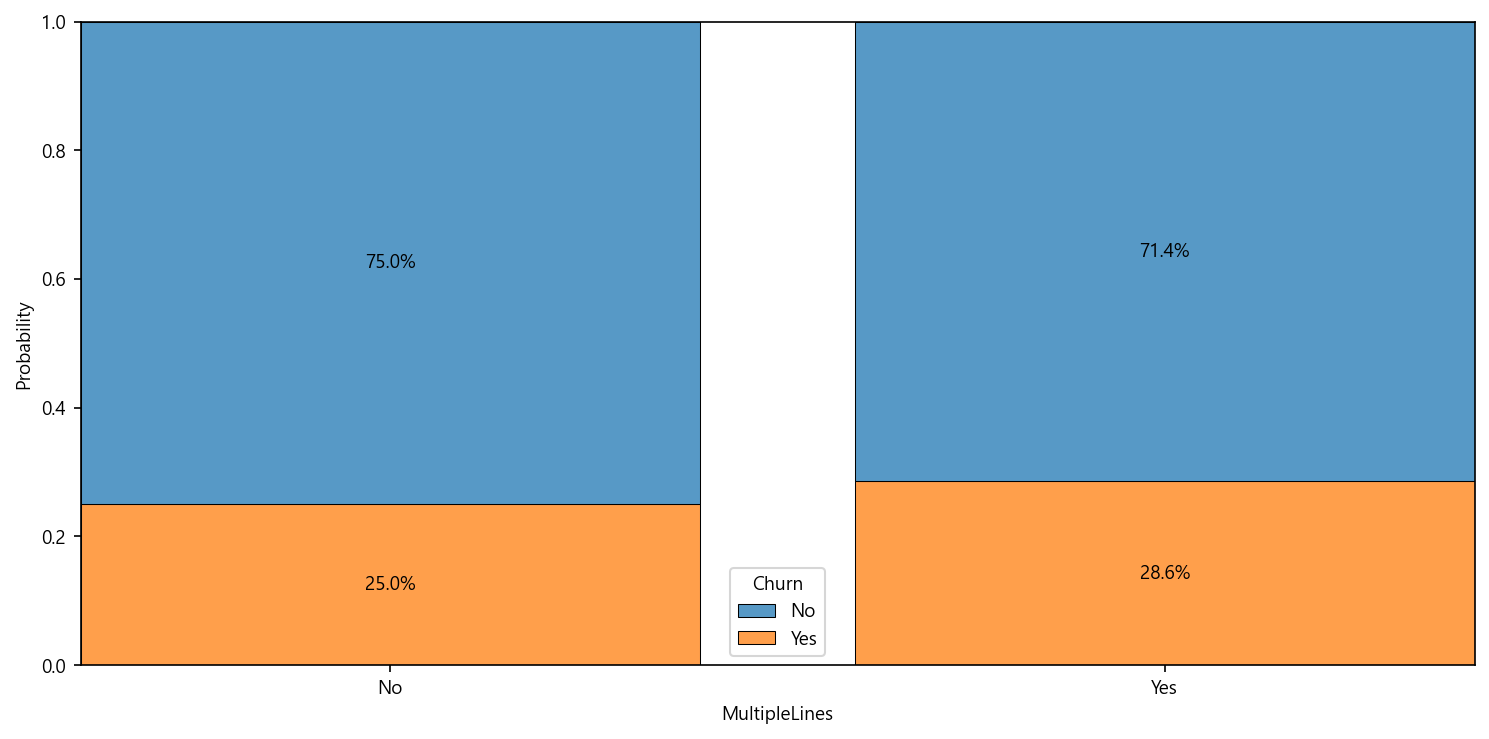

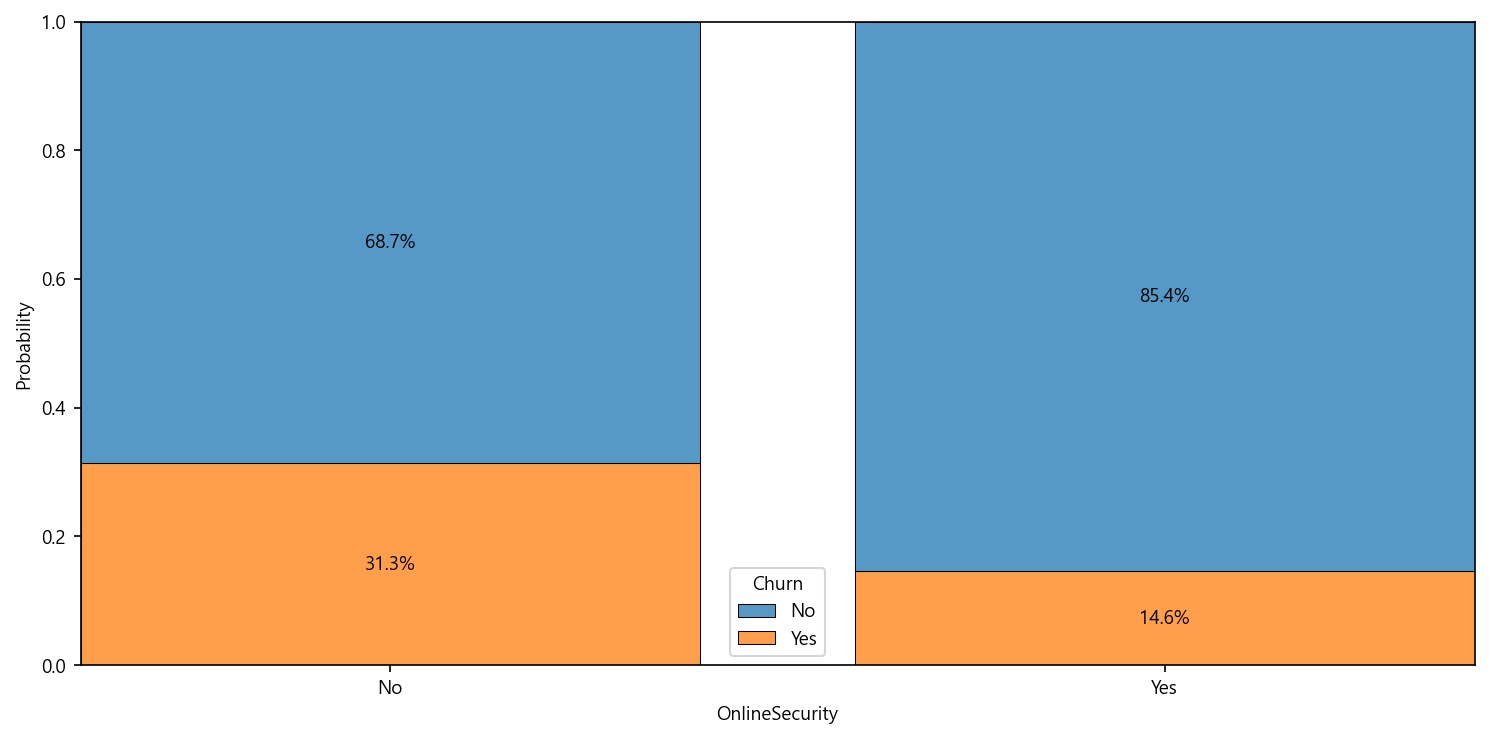

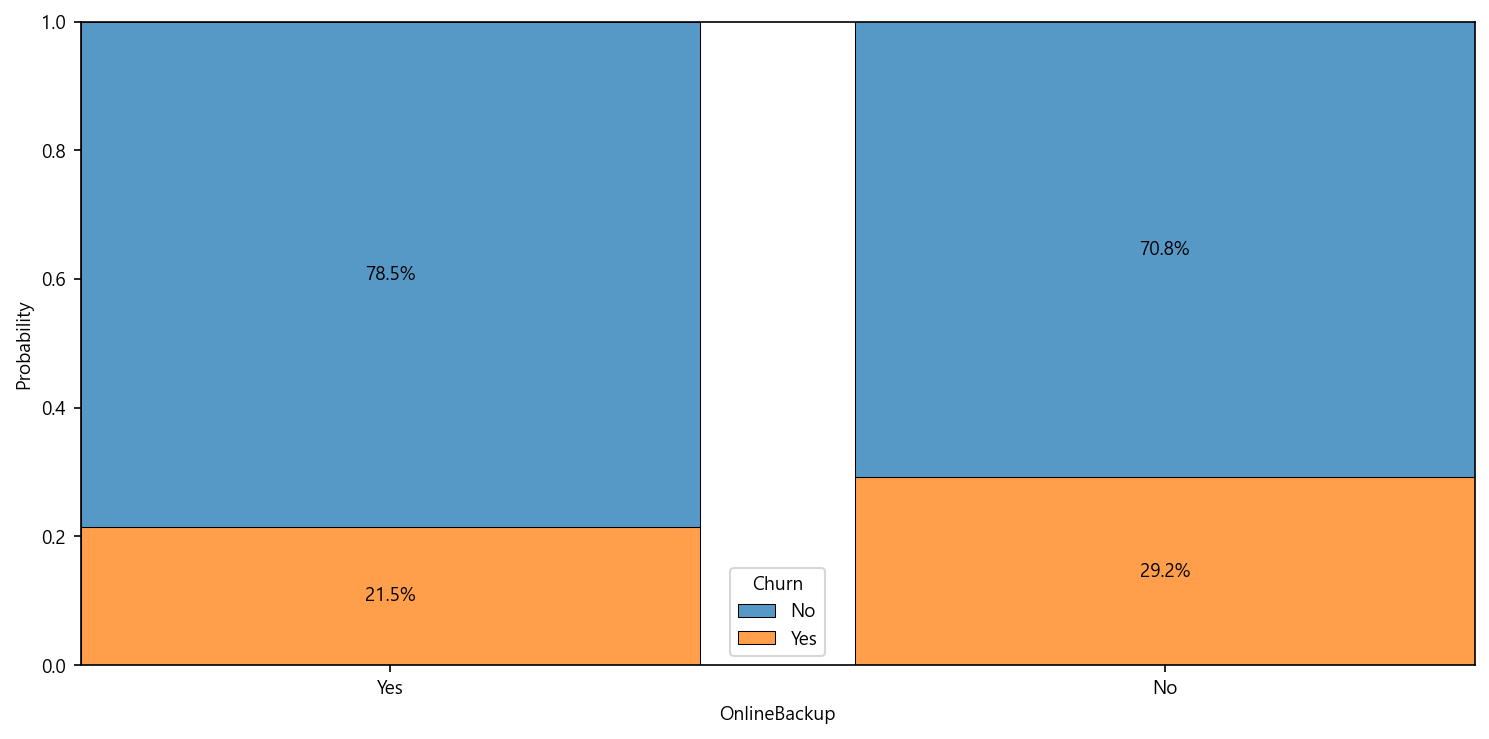

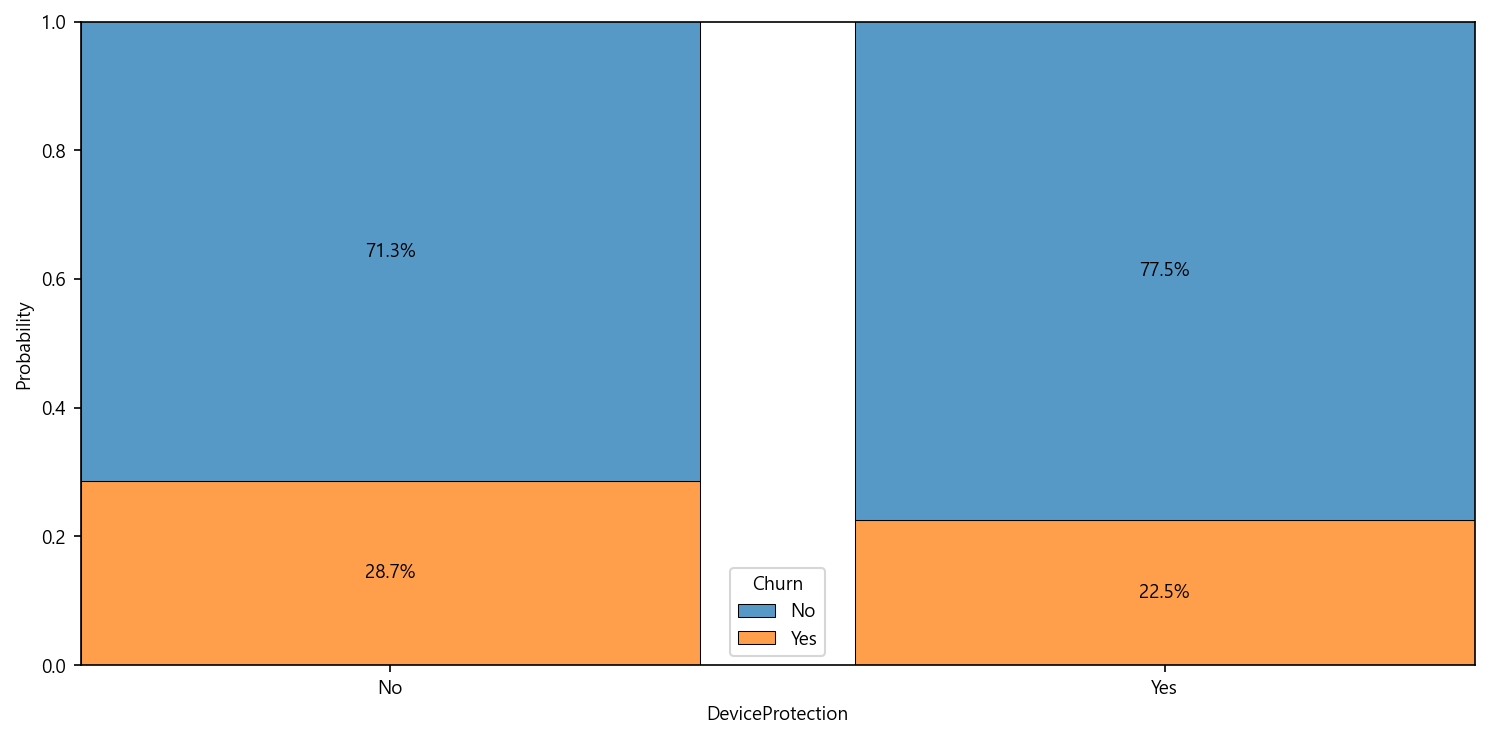

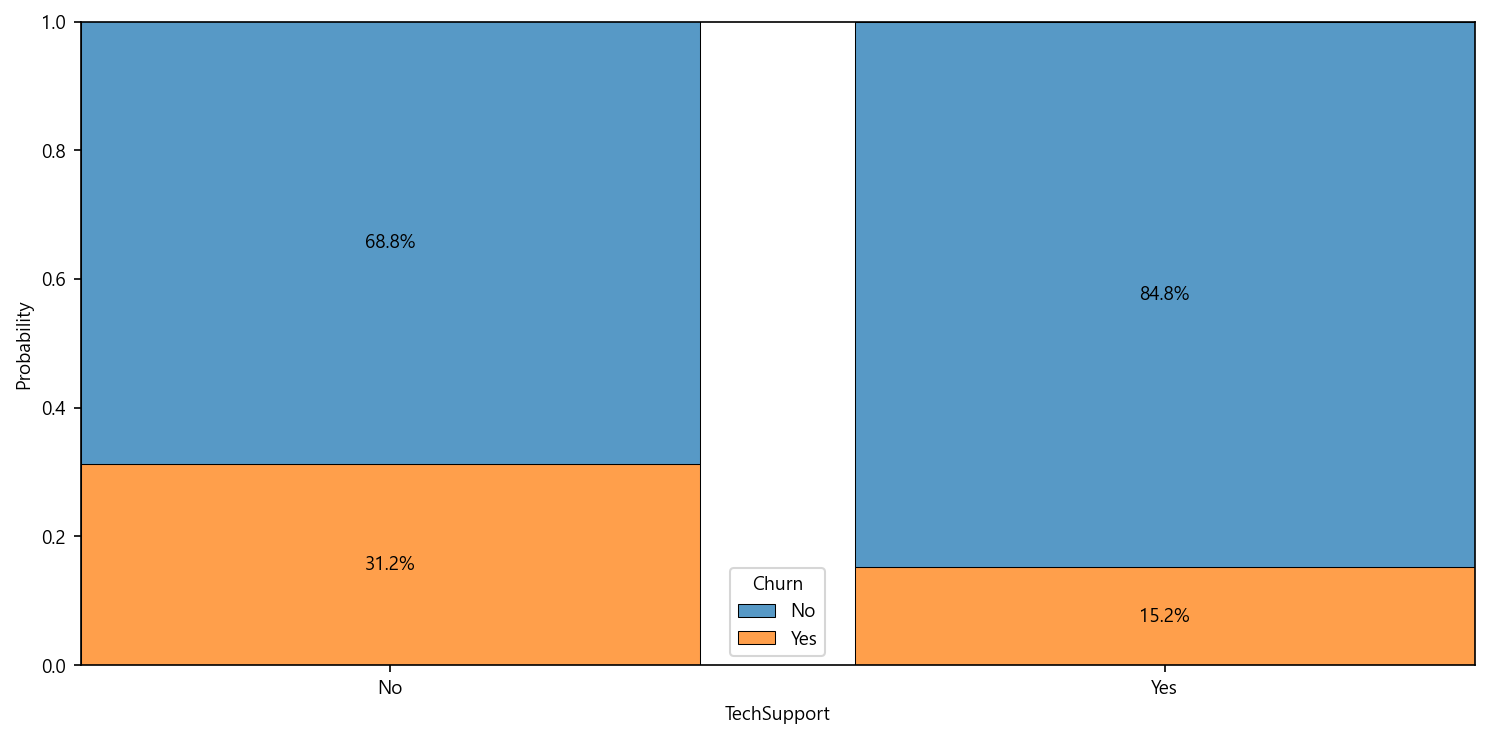

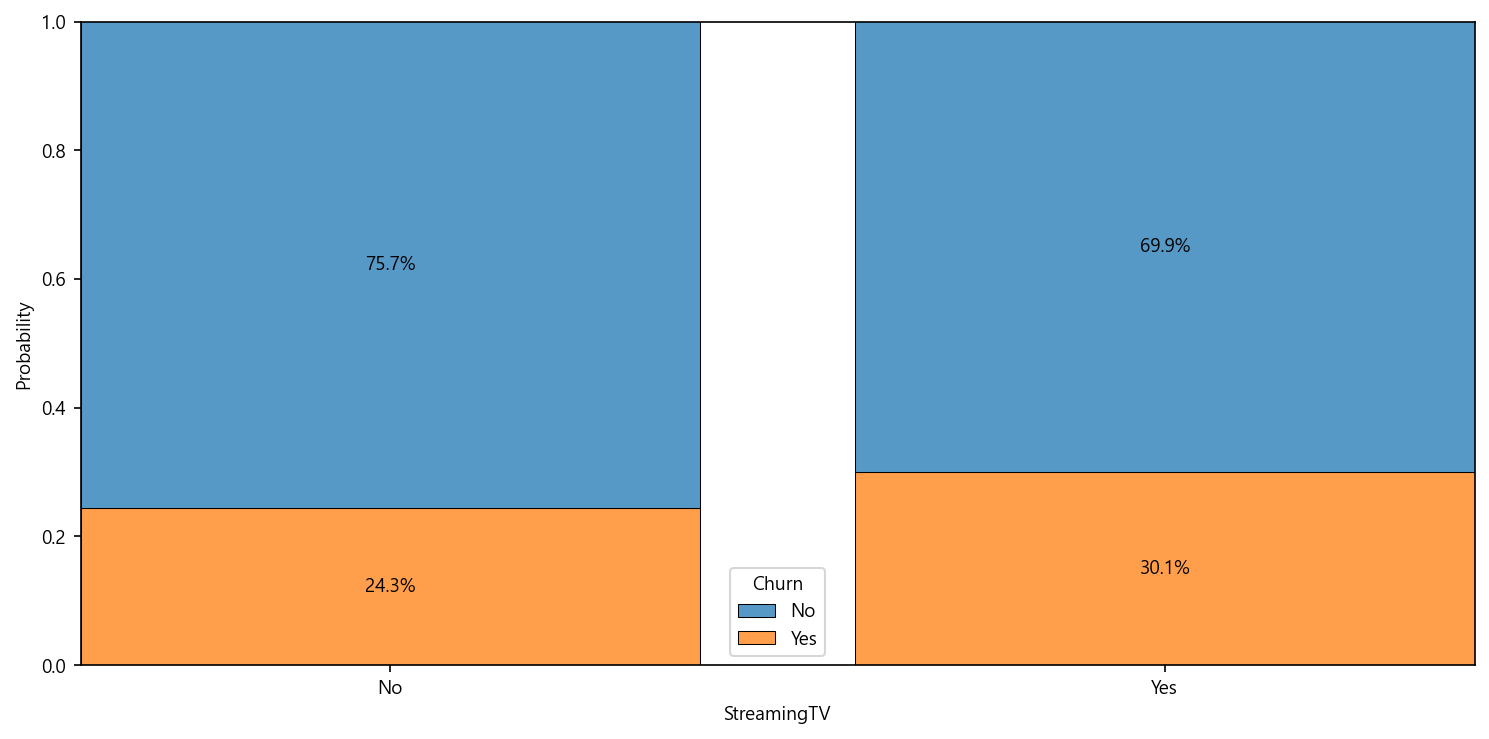

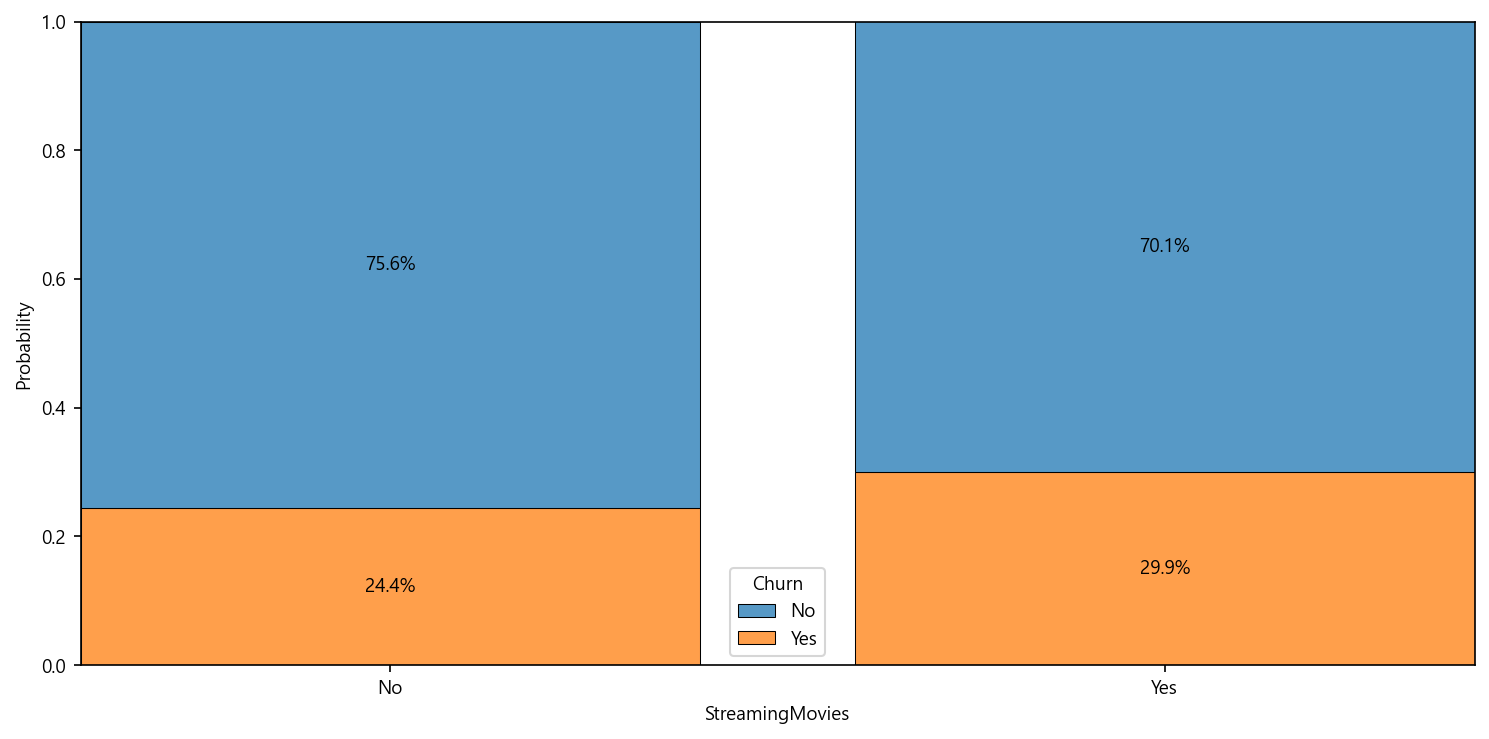

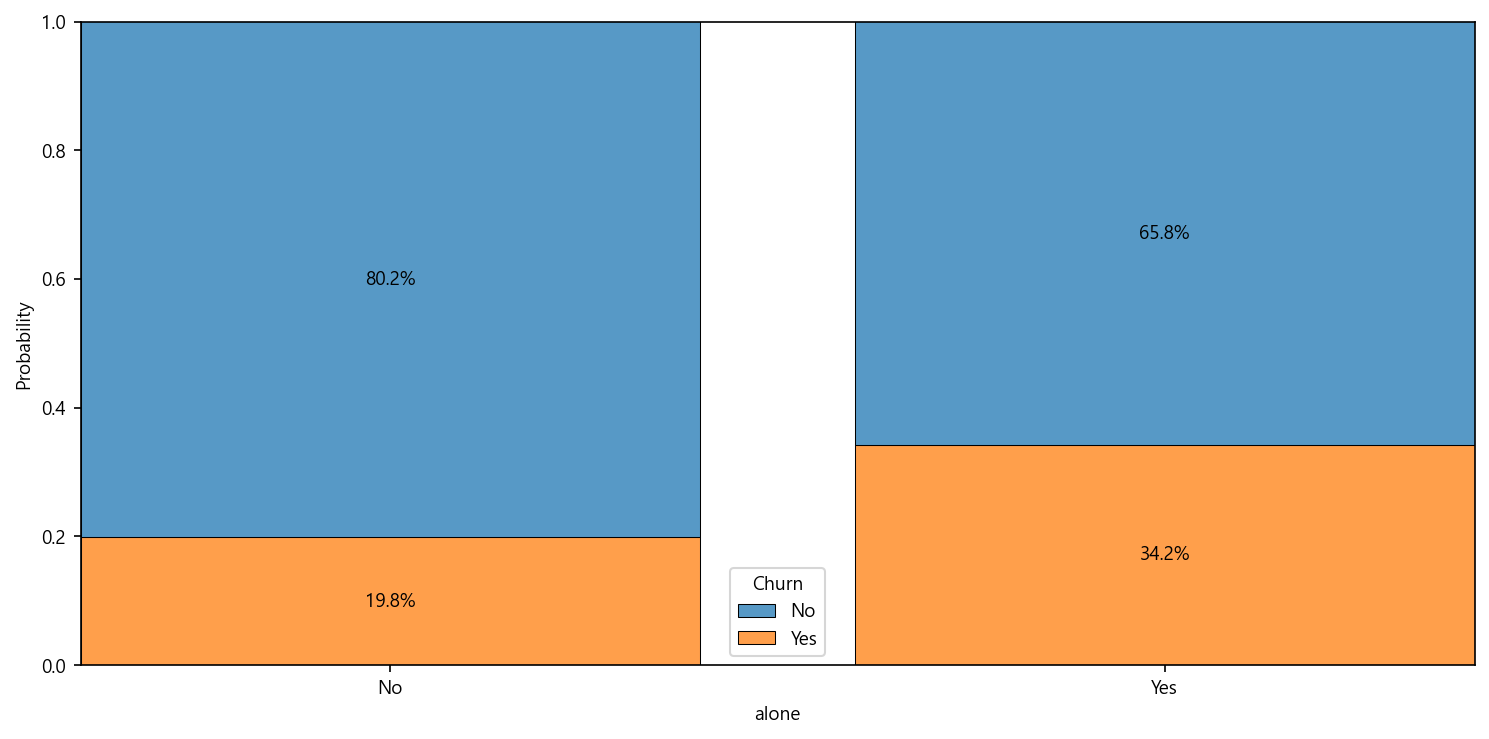

In [295]:
for i in ['gender','Partner','Dependents','PhoneService','PaperlessBilling','InternetService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','alone']:
    my_stackplot(df, i, hue = 'Churn')

In [296]:
TotalCharges = list(df['TotalCharges'])
null_charges = []
for i,v in enumerate(df['TotalCharges']):
    if v ==' ' : null_charges.append(i)
for i in null_charges:
    TotalCharges[i] = df['Contract'][i]*df['MonthlyCharges'][i]
df['TotalCharges'] = TotalCharges

In [297]:
for i in column_name:
    print(df[i].value_counts())

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No     4072
Yes    2971
Name: MultipleLines, dtype: int64
1    5517
0    1526
Name: InternetService, dtype: int64
No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64
No     4999
Yes    2044
Name: TechSupport, dtype: int64
No     4

In [298]:
df2 = my_standard_scaler(df.drop('customerID',axis=1), 'Churn')
df2.head()



,SeniorCitizen,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender,Partner,Dependents,...,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,alone,Churn
0,-0.439916,-1.277445,0.525927,-0.904184,-0.878028,-1.160323,-0.992667,Female,Yes,No,...,No,No,Yes,No,No,No,No,Yes,No,No
1,-0.439916,0.066327,0.525927,1.105970,-0.878028,-0.259629,-0.172198,Male,No,No,...,No,Yes,No,Yes,No,No,No,No,Yes,No
2,-0.439916,-1.236724,0.525927,-0.904184,-0.878028,-0.362660,-0.958122,Male,No,No,...,No,Yes,Yes,No,No,No,No,Yes,Yes,Yes
3,-0.439916,0.514251,0.525927,1.105970,1.138916,-0.746535,-0.193706,Male,No,No,...,No,Yes,No,Yes,Yes,No,No,No,Yes,No
4,-0.439916,-1.236724,0.525927,-0.904184,-0.878028,0.197365,-0.938930,Female,No,No,...,No,No,No,No,No,No,No,Yes,Yes,Yes


In [299]:
df3 = my_labelling(df.drop('customerID',axis=1),'gender','Partner','Dependents','PaperlessBilling','PhoneService','InternetService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn','alone')



In [300]:
x_train, x_test, y_train, y_test = my_train_test_split(df3, 'Churn')
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((4930, 20), (2113, 20), (4930,), (2113,))

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  7 |   0.1 | l2        |          0.806491 |
|  4 |  0.01 | l2        |           0.80568 |
| 13 |    10 | l2        |          0.802434 |
| 10 |     1 | l2        |          0.802434 |
| 16 |   100 | l2        |          0.802028 |
|  1 | 0.001 | l2        |          0.796146 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.282974 |     0.268507 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.807708 |     0.798391 | 예측 결과(TN,FP,TP,TN)가 실제 결과

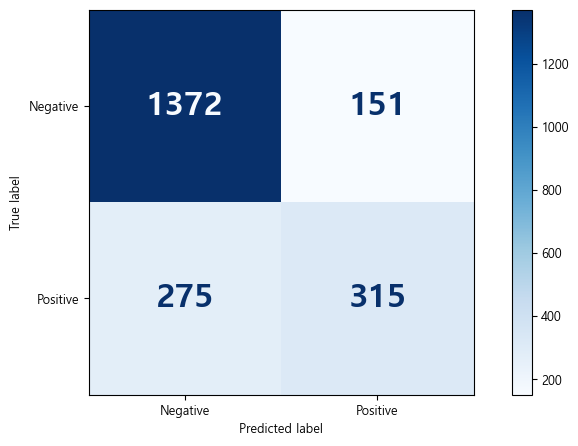


[ROC/PR Curve]


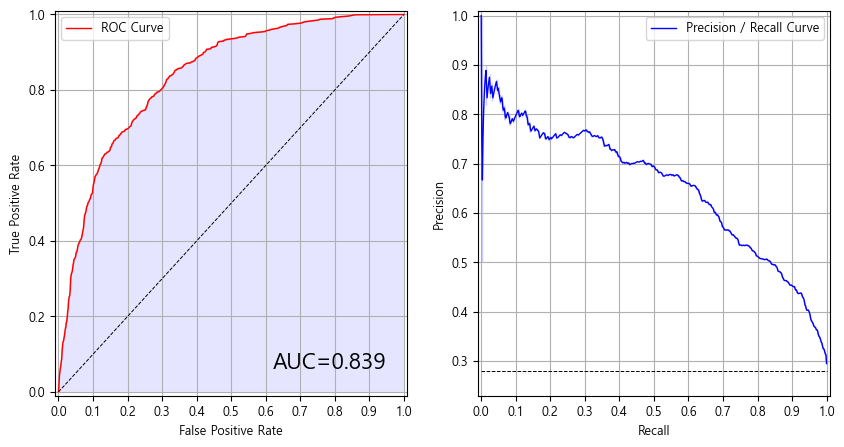


[학습곡선]


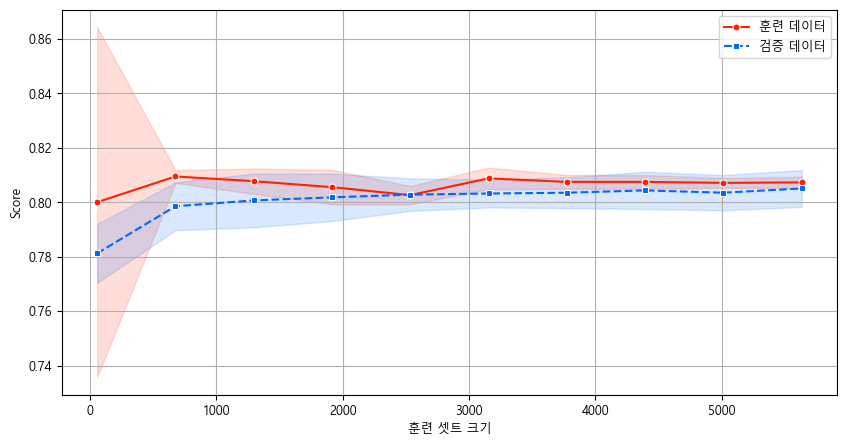

+----+------------+------------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수         |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+------------------+--------------------+------------+---------+------------+---------+------------|
| 17 | Churn      | MonthlyCharges   |             0.0291 |      0.007 |  4.1394 |          0 | 77.7171 |     1.0295 |
|  7 | Churn      | InternetService  |             0.2353 |      0.348 |  0.6762 |      0.499 | 22.4572 |     1.2653 |
|  5 | Churn      | PhoneService     |            -1.0205 |      0.313 | -3.2566 |      0.001 | 19.7265 |     0.3604 |
| 18 | Churn      | TotalCharges     |             0.0003 |          0 |  2.1684 |       0.03 | 18.8796 |     1.0003 |
|  4 | Churn      | tenure           |            -0.0583 |      0.011 | -5.3595 |          0 |  16.693 |     0.9433 |
| 19 | Churn      | alone            |            -0.0101 |      0.334

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)

In [301]:
my_logistic_classification(x_train, y_train, x_test, y_test)

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
| 10 |     1 | l2        |          0.799189 |
| 13 |    10 | l2        |          0.798783 |
| 16 |   100 | l2        |          0.798783 |
|  4 |  0.01 | l2        |          0.797566 |
|  7 |   0.1 | l2        |           0.79716 |
|  1 | 0.001 | l2        |          0.780325 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.267049 |     0.254298 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.799189 |     0.791292 | 예측 결과(TN,FP,TP,TN)가 실제 결과

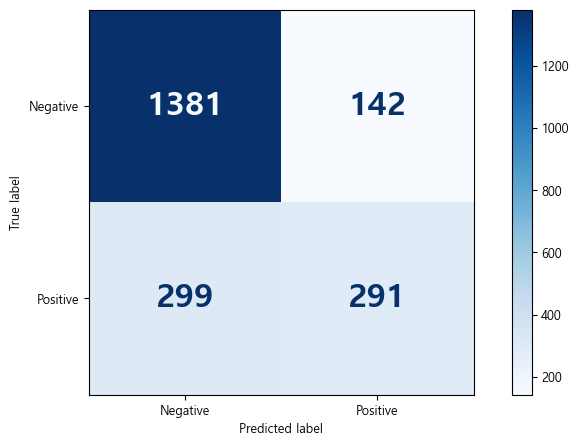


[ROC/PR Curve]


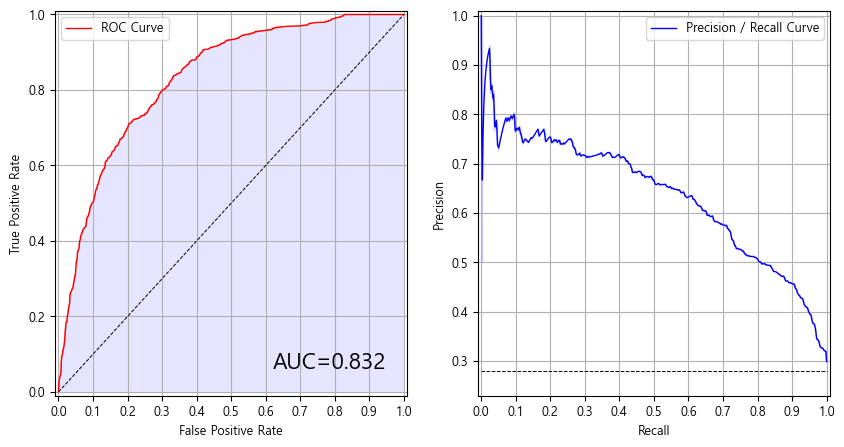


[학습곡선]


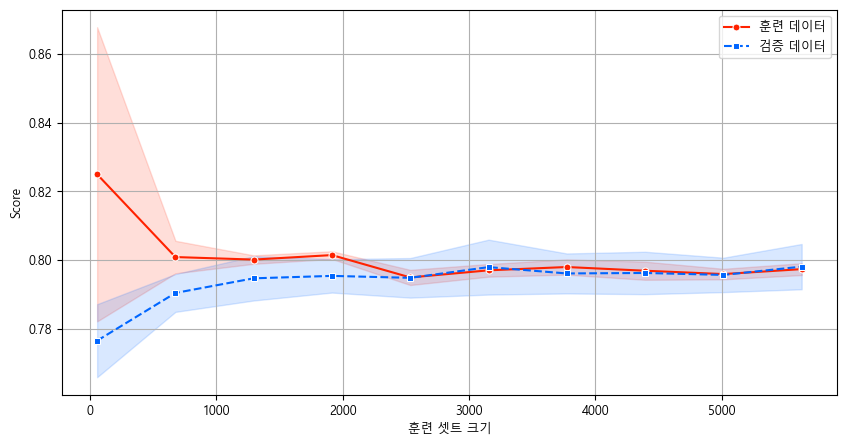

+----+------------+------------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수         |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+------------------+--------------------+------------+---------+------------+---------+------------|
|  7 | Churn      | InternetService  |             1.4464 |      0.223 |  6.4951 |          0 | 8.82924 |     4.2478 |
|  5 | Churn      | PhoneService     |             0.0489 |        0.2 |  0.2443 |      0.807 | 8.82604 |     1.0501 |
|  4 | Churn      | tenure           |            -0.0335 |      0.004 | -8.0643 |          0 | 6.69817 |     0.9671 |
| 17 | Churn      | alone            |             0.0953 |      0.336 |  0.2837 |      0.777 | 6.58202 |     1.0999 |
|  2 | Churn      | Partner          |             0.0707 |        0.3 |   0.236 |      0.813 | 6.12564 |     1.0733 |
| 14 | Churn      | Contract         |            -0.9023 |      0.182

LogisticRegression(C=1, max_iter=500, n_jobs=-1)

In [308]:
ignore = ['MonthlyCharges','TotalCharges']
x_tr = x_train.drop(ignore, axis=1)
x_te = x_test.drop(ignore, axis=1)
my_logistic_classification(x_tr, y_train, x_te, y_test)

In [305]:
smote_sampler = SMOTE(sampling_strategy="auto", k_neighbors=7, random_state=777)
x_sm, y_sm = smote_sampler.fit_resample(x_train, y_train)
y_sm.value_counts()

0    3651
1    3651
Name: Churn, dtype: int64

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  4 |  0.01 | l2        |          0.817051 |
| 13 |    10 | l2        |          0.816372 |
|  7 |   0.1 | l2        |          0.816371 |
| 10 |     1 | l2        |          0.815825 |
| 16 |   100 | l2        |          0.814729 |
|  1 | 0.001 | l2        |          0.771302 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.436275 |     0.211344 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.828129 |     0.770942 | 예측 결과(TN,FP,TP,TN)가 실제 결과

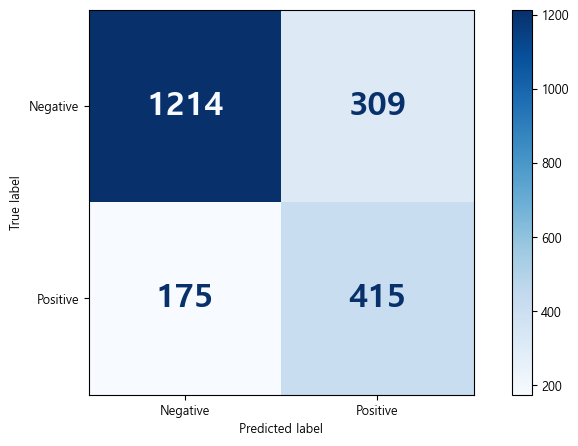


[ROC/PR Curve]


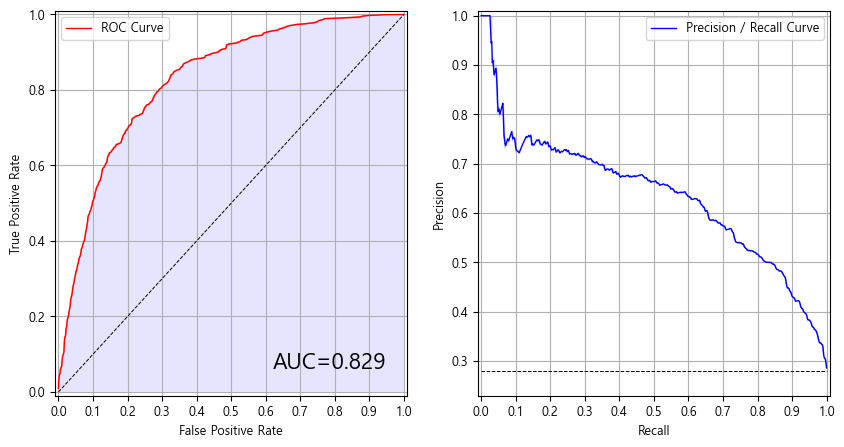


[학습곡선]


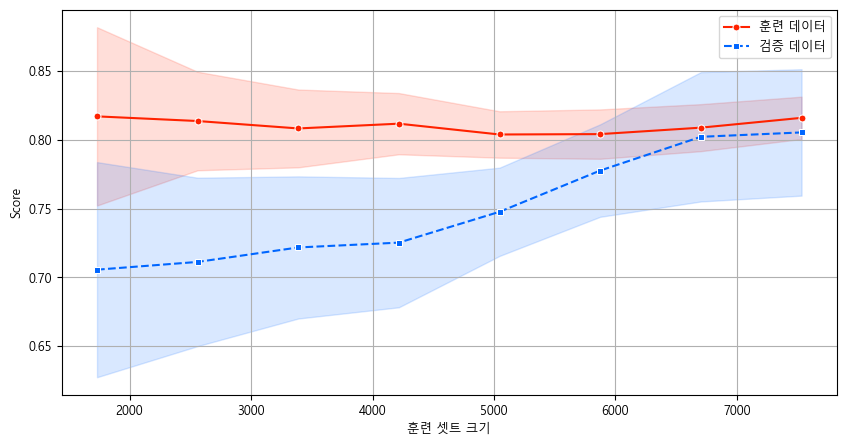

LogisticRegression(C=0.01, max_iter=500, n_jobs=-1)

In [306]:
my_logistic_classification(x_sm, y_sm, x_test, y_test, report=False)